## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

dataset = pd.read_csv('titanic.csv')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [4]:
numeric_stats = dataset.describe()
print("Basic statistical information on numeric variables:")
print(numeric_stats)

shape = dataset.shape
print("\nDimension date", shape)

data_types = dataset.dtypes
data_counts = dataset.count()
print("\nTypes of variables and the amount of data for each variable:")
print(pd.DataFrame({'Data Type': data_types, 'Data Count': data_counts}))

Basic statistical information on numeric variables:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Dimension date (891, 12)

Ty

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [5]:
missing_values = dataset.isnull().sum()
print("Number of missing values for each attribute:")
print(missing_values)

Number of missing values for each attribute:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:Після аналізу ми можемо побачити 177 пропущених значень для атрибуту "Age", і 687 пропущених значень для атрибуту "Cabin", а також 2 пропущених значень для атрибуту "Embarked"

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



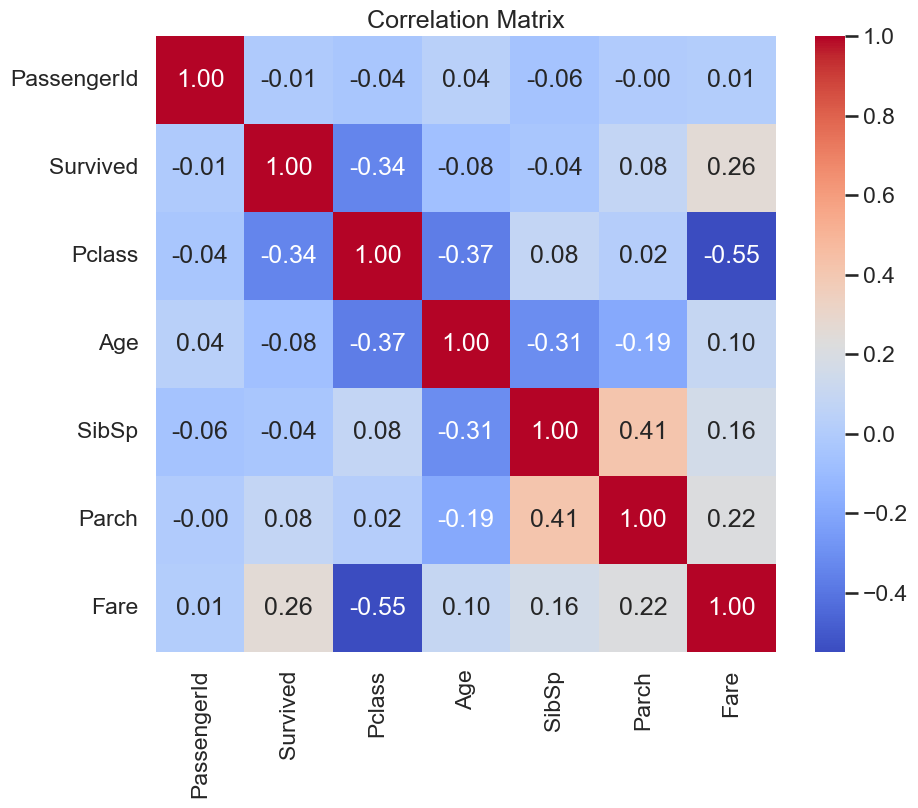

Description of results:
Values of correlation coefficients:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [6]:
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_dataset.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

print("Description of results:")
print("Values of correlation coefficients:")
print(correlation_matrix)

Ваші висновки: Отримана матриця кореляції вказує на ступінь зв'язку між числовими змінними. Значення кореляційних коефіцієнтів наближені до 1 вказують на сильну позитивну залежність, тоді як ті, що наближені до -1, вказують на сильну від'ємну залежність.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [7]:
#1
def fill_missing_values(df, column_name, groupby_columns):
    df[column_name] = df.groupby(groupby_columns)[column_name].transform(lambda x: x.fillna(x.mean()))
    return df

filled_df = fill_missing_values(dataset, 'Age', ['Pclass', 'Sex'])

print(filled_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                               Heikkinen, Miss. Laina  female  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
4                             Allen, Mr. William Henry    male  35.00      0   
..                                                 ...     ... 

In [8]:
#2
data = {
    'Pclass': [1, 2, 3, 1, 2, 3],
    'Sex': ['male', 'female', 'male', 'female', 'male', 'female'],
    'Age': [None, 25, 30, None, 35, 40],
    'Fare': [100, 50, 30, 150, 80, 60]
}
df = pd.DataFrame(data)

print("Initial dataframe with missing values:\n", df)

def fill_missing_values(df, column_name, replace_value):
    filled_column = df[column_name].fillna(replace_value)
    df[column_name] = filled_column
    return df

filled_df = fill_missing_values(df, 'Age', 20)

print("\nDataframe with filled missing values:\n", filled_df)

Initial dataframe with missing values:
    Pclass     Sex   Age  Fare
0       1    male   NaN   100
1       2  female  25.0    50
2       3    male  30.0    30
3       1  female   NaN   150
4       2    male  35.0    80
5       3  female  40.0    60

Dataframe with filled missing values:
    Pclass     Sex   Age  Fare
0       1    male  20.0   100
1       2  female  25.0    50
2       3    male  30.0    30
3       1  female  20.0   150
4       2    male  35.0    80
5       3  female  40.0    60


Ваші висновки: У результаті заповнення пропущених значень у стовпці "Age" за допомогою значеня 20, було отримано оновлений датафрейм, де всі пропущені значення були замінені вказаними константами.

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





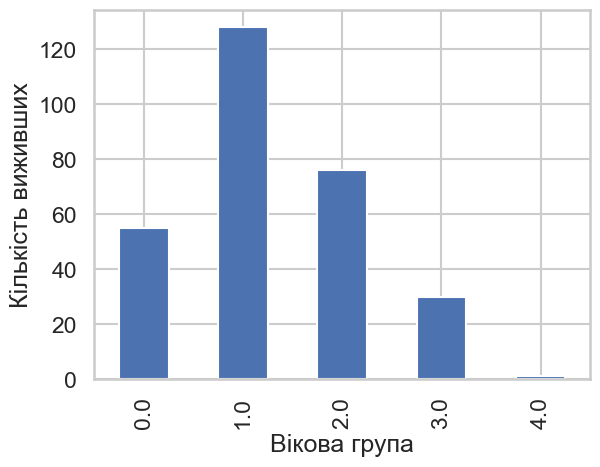

In [17]:
df = pd.read_csv('titanic.csv')

max_age = df['Age'].max()

n_bins = 5

bins = np.linspace(0, max_age, n_bins + 1)

df['Age_bin'] = pd.cut(df['Age'], bins, labels=False)

df.groupby('Age_bin')['Survived'].sum().plot.bar()

plt.xlabel('Вікова група')
plt.ylabel('Кількість виживших')

plt.show()

Ваші висновки: Найбільша кількість виживших це Вікова група 1.0(16-32 років) та 2.0(32-48 років), а найменша 4.0(64-80 років).

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [21]:
titanic_data = sns.load_dataset('titanic')

titanic_data['fare_quartile'] = pd.qcut(titanic_data['fare'], 4)

survived_by_quartile = titanic_data.groupby('fare_quartile')['survived'].mean()
print("\nThe number of surviving passengers by quartile fare values:\n", survived_by_quartile)



The number of surviving passengers by quartile fare values:
 fare_quartile
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: survived, dtype: float64


C:\Users\dzydz\AppData\Local\Temp\ipykernel_15848\2667425817.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_by_quartile = titanic_data.groupby('fare_quartile')['survived'].mean()


Ваші висновки:Розділення значень змінної fare дозволило виявити залежність між ціною квитка та шансами на виживання на Титаніку.

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

   Family_size  Alone
0            1      0
1            1      0
2            0      1
3            1      0
4            0      1


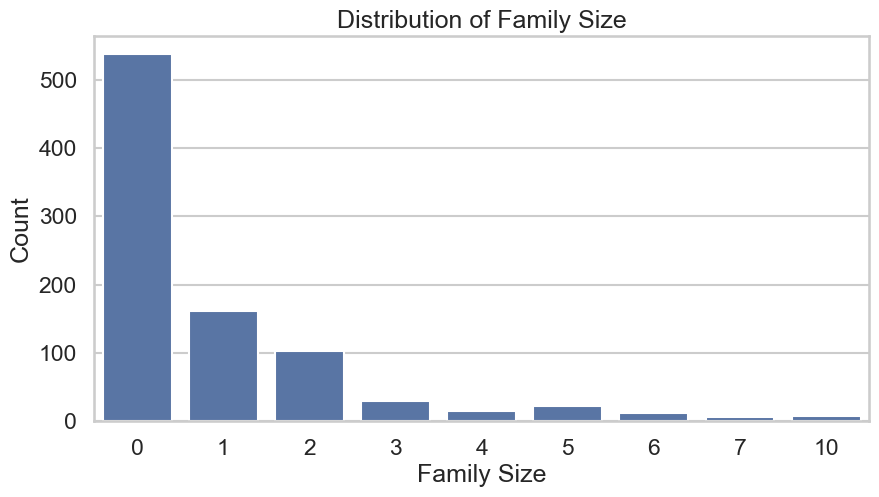

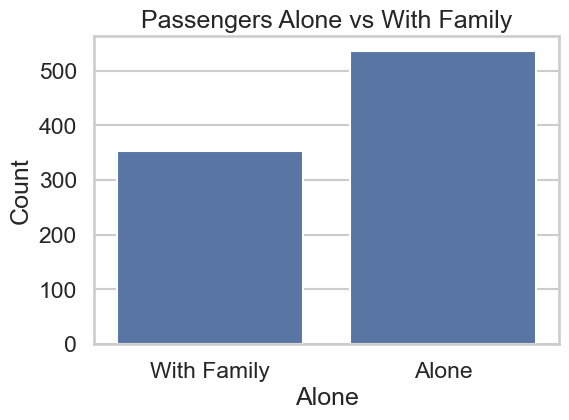

       Family_size       Alone
count   891.000000  891.000000
mean      0.904602    0.602694
std       1.613459    0.489615
min       0.000000    0.000000
25%       0.000000    0.000000
50%       0.000000    1.000000
75%       1.000000    1.000000
max      10.000000    1.000000


In [39]:
dataset['Family_size'] = dataset['Parch'] + dataset['SibSp']

dataset['Alone'] = (dataset['Family_size'] == 0).astype(int)

print(dataset[['Family_size', 'Alone']].head())

plt.figure(figsize=(10, 5))
sns.countplot(x='Family_size', data=dataset)
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Alone', data=dataset)
plt.title('Passengers Alone vs With Family')
plt.xlabel('Alone')
plt.ylabel('Count')
plt.xticks([0, 1], ['With Family', 'Alone'])
plt.show()

print(dataset[['Family_size', 'Alone']].describe())

Ваші висновки:На основі аналізу нових змінних Family_size та Alone можна припустити, що наявність сім'ї може впливати на виживання пасажирів, а самотні пасажири мали менші шанси на виживання.

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [6]:
df.drop('Cabin', axis=1, inplace=True)

Ваші висновки:Атрибут Cabin був успішно видаленний

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [18]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df = pd.get_dummies(df, columns=['Embarked'])

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Age_bin  Embarked_C  Embarked_Q  \
0         A/5 21171   7.2500   NaN      1.0       False       False   
1          PC 17599  71.2833   C85      2.0        True       False   
2  STON/O2. 3101282   7.9250   NaN      1.0       False       False   
3           

Ваші висновки:Перетворили змінні Sex, Embarked та Title в числові значення.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



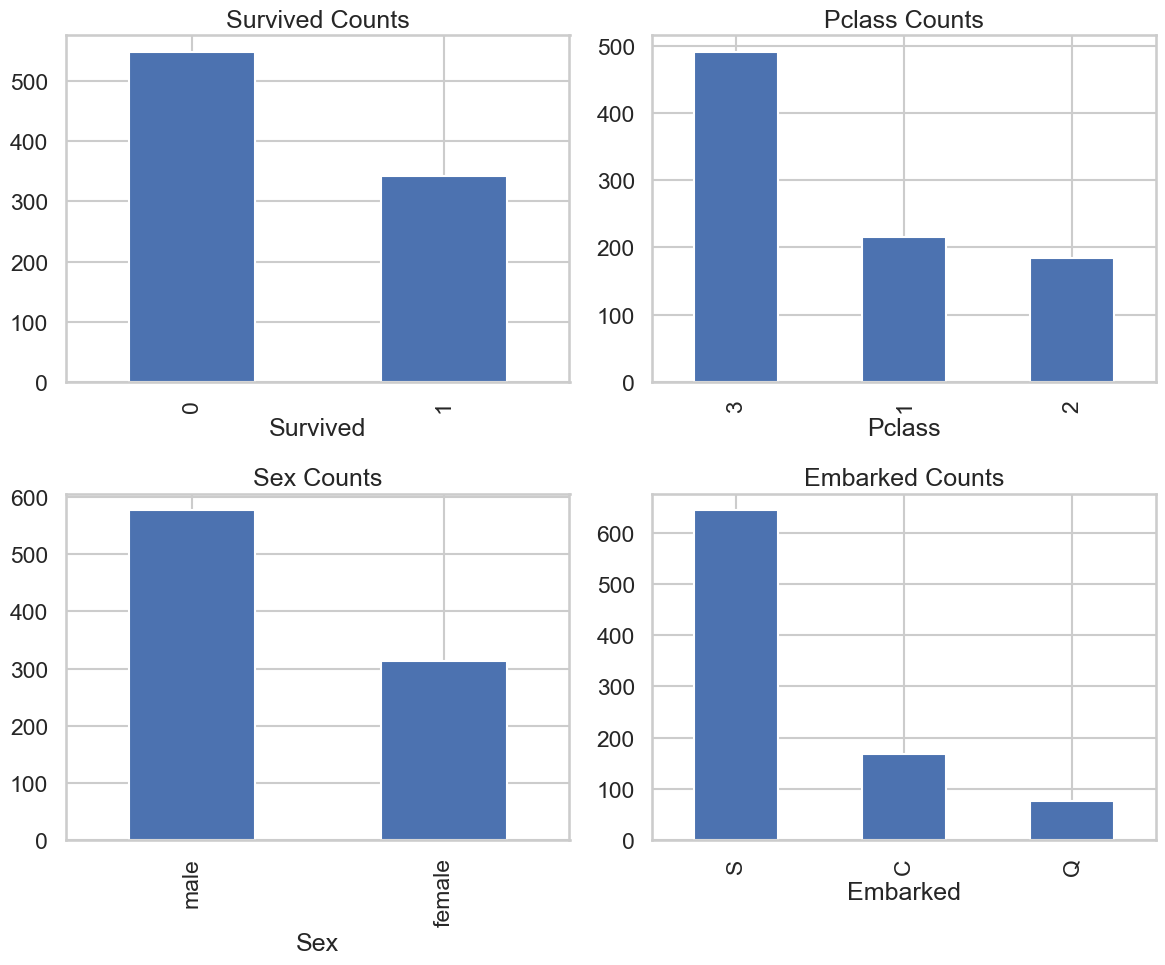

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

dataset['Survived'].value_counts().plot(kind='bar', ax=axes[0, 0], title='Survived Counts')
dataset['Pclass'].value_counts().plot(kind='bar', ax=axes[0, 1], title='Pclass Counts')
dataset['Sex'].value_counts().plot(kind='bar', ax=axes[1, 0], title='Sex Counts')
dataset['Embarked'].value_counts().plot(kind='bar', ax=axes[1, 1], title='Embarked Counts')

plt.tight_layout()
plt.show()

Ваші висновки:Виділити категоріальні змінні Survived, Pclass, Sex, Embarked та побудували сітку графіків кількості спостережень по кожній категорії

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

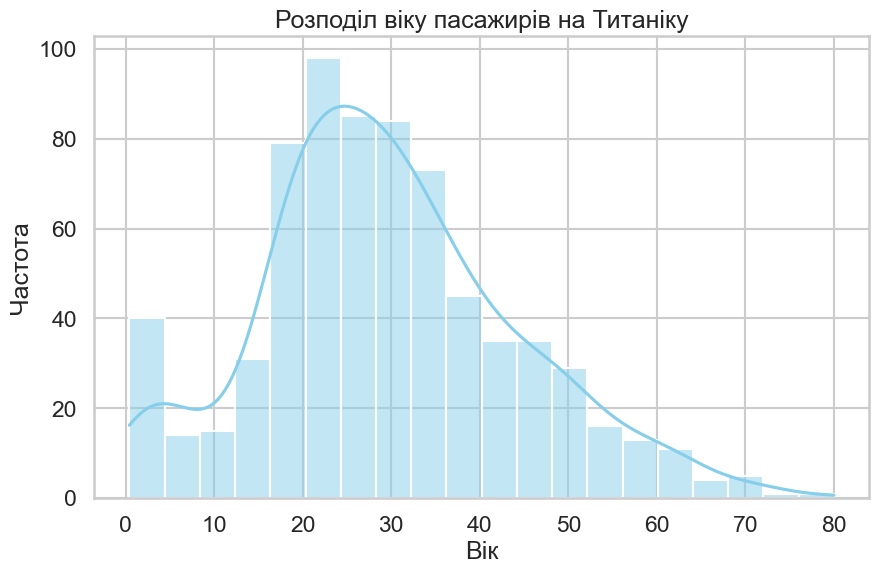

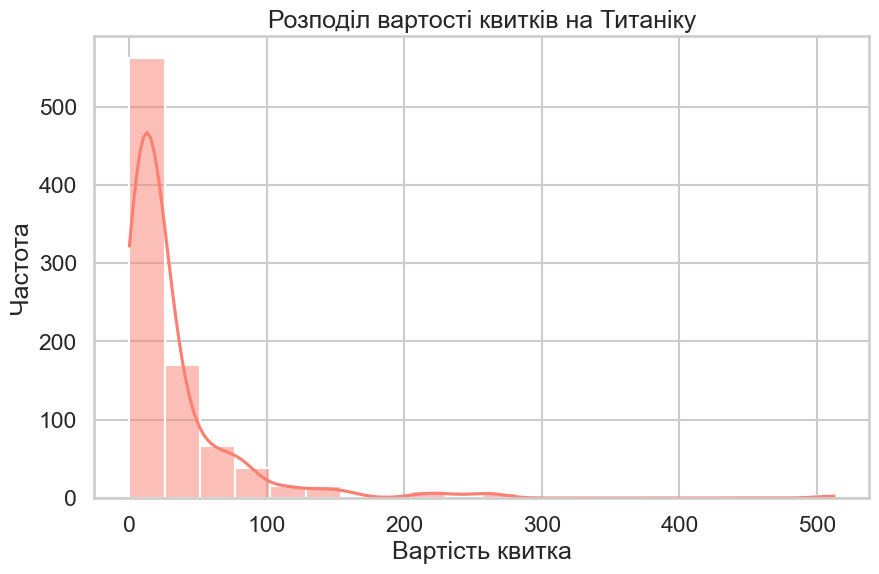

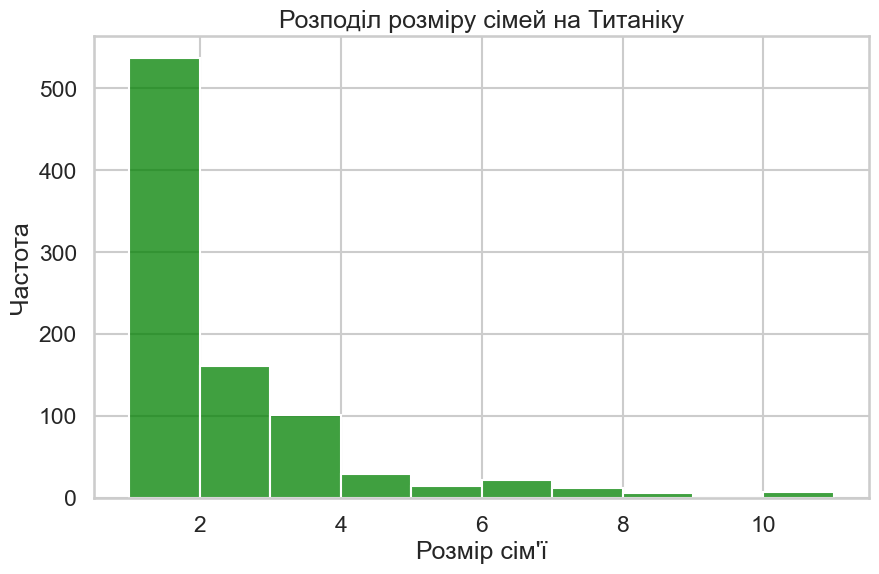

In [38]:
dataset['Family_size'] = dataset['SibSp'] + dataset['Parch'] + 1

plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Age', kde=True, bins=20, color='skyblue')
plt.title('Розподіл віку пасажирів на Титаніку')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Fare', kde=True, bins=20, color='salmon')
plt.title('Розподіл вартості квитків на Титаніку')
plt.xlabel('Вартість квитка')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Family_size', kde=False, bins=range(1, 12), color='green')
plt.title('Розподіл розміру сімей на Титаніку')
plt.xlabel('Розмір сім\'ї')
plt.ylabel('Частота')
plt.show()


Ваші висновки:Побудували три діаграми по числовим розподілам та дізналися таку інформацію: що більшість пасажирів були молодими людьми, оплата за квитки переважно сконцентрована в нижній ціновій категорії, а більшість сімей складалася з однієї або двох осіб.

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

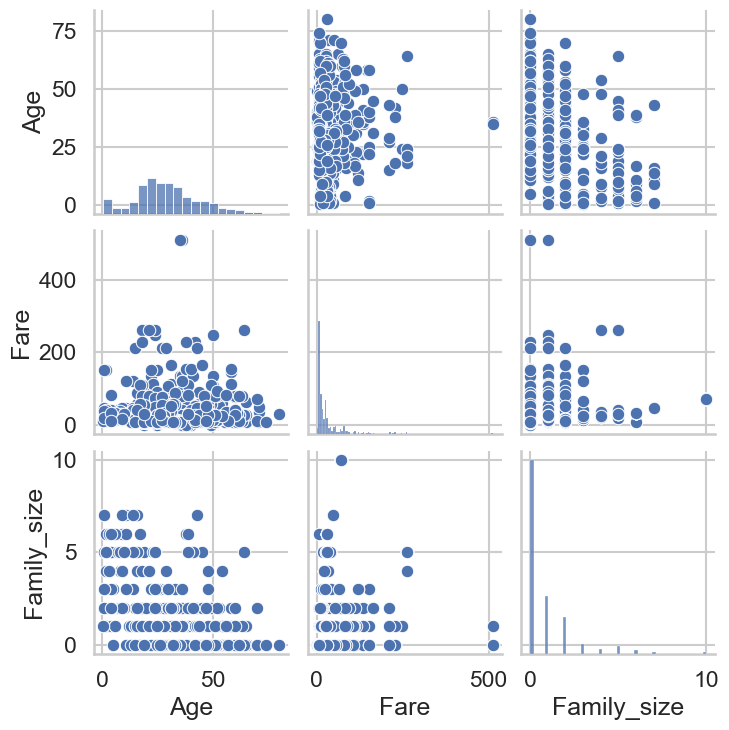

In [41]:
df['Family_size'] = df['SibSp'] + df['Parch']

selected_vars = ['Age', 'Fare', 'Family_size']
df_selected = df[selected_vars]

sns.pairplot(df_selected)
plt.show()

Ваші висновки:Після аналізу графіків співвідношень між змінними 'Age', 'Fare' і 'Family_size' виявлено, що існує слабка позитивна кореляція між віком та вартістю квитка, при цьому не спостерігається виражених зв'язків між віком та розміром сім'ї. Додаткове дослідження може допомогти зрозуміти природу цих зв'язків та їх потенційні наслідки.

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.